<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/01_Introduction_to_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

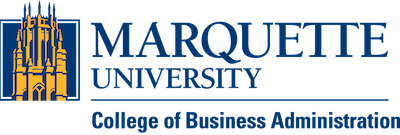

#BUAN4060: Unstructured Data Analytics

##01 Introduction to R

#Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by Prof. Timothy E. Carone

**R on Colab:**

* In this session we learn how to use the Colab and write R code

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



##1. Problem Statement
Business Problem: To predict the Hospital cost based on Past Data.

Business Solution: Build a Machine Learning Model using Multiple Linear Regression Algorithm.

TOTCHG(Hospital Discharge Cost) is dependent variable in given data.

All other 5 variables such as Age, Female, Length of Stay, RACE and TOTCHG Are independent variable.

In [ ]:
# Drag & drop the file in your Colab files

data=read.csv("/content/HospitalCosts.csv")
head(data)

# data is a variable being defined where the csv will be loaded into
# head will show the 1st few lines of the loaded file

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


##Train Test Split

In [ ]:
install.packages('caTools')
library(caTools)

# APRDRG: All Patient Refined Diagnosis-Related Group
#caTools provides vrious utlity functions for data analysis, particularly classification & regression activities

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
set.seed(1)
# random seed to ensure reproducability

sample=sample.split(data$TOTCHG,SplitRatio = 0.80)
# specifies the variable in the data set we want to use for splitting

train_data=subset(data,sample==TRUE)
test_data=subset(data,sample==FALSE)
# splits the data into 2 subgroups

##Model Building

In [ ]:
model=lm(TOTCHG~.,data = train_data)
# fits a regression line to the training data set
# by identifying the column of interest, we are trying to predict it

summary(model)
# displays the regression analysis summary


Call:
lm(formula = TOTCHG ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6027   -853   -159    146  42906 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5123.8780   618.0184   8.291 1.80e-15 ***
AGE          150.1851    21.2746   7.059 7.62e-12 ***
FEMALE      -343.0310   300.4870  -1.142    0.254    
LOS          789.1367    49.0452  16.090  < 2e-16 ***
RACE        -252.1402   273.3765  -0.922    0.357    
APRDRG        -7.8197     0.8176  -9.565  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2841 on 393 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4897,	Adjusted R-squared:  0.4832 
F-statistic: 75.44 on 5 and 393 DF,  p-value: < 2.2e-16


P value of Age, LoS and APRDRG is less than 0.05, So they are Significant variable. We will rebuild model using only significant variable.

In [ ]:
newModel=lm(TOTCHG~AGE+LOS+APRDRG,data = train_data)
# added only the columns of interest
summary(newModel)


Call:
lm(formula = TOTCHG ~ AGE + LOS + APRDRG, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6201   -873   -139    163  42864 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4801.1658   520.7266   9.220  < 2e-16 ***
AGE          144.7810    20.7931   6.963 1.39e-11 ***
LOS          789.4263    48.9385  16.131  < 2e-16 ***
APRDRG        -7.9746     0.7942 -10.042  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2838 on 396 degrees of freedom
Multiple R-squared:  0.4873,	Adjusted R-squared:  0.4834 
F-statistic: 125.4 on 3 and 396 DF,  p-value: < 2.2e-16


##Model Interpretation

1. P value of Age, Female and APRDRG is less than 0.05, So they are Significant variable

2. Slope of Significant independent Variables:-

Age: 144.78

LOS: 789.42

APRDRG: -7.97

3. (a) One unit increase in Age will Increase TOTCHG by 144.78

    (b) One unit increase in LOS will increase TOTCHG by 789.42

    (c) One unit increase in APRDRG will decrease TOTCHG by 7.97

4. R squared is 0.4873, So 48.73% of dependent variable is explained by independent variables

5. Adjusted R squared is 0.4834 which is less than R Squared

##Predection and Evaluation

In [ ]:
TOTCHG_prediction=predict(newModel,newdata = test_data)
# This line uses the predict() function to make predictions based on the linear regression model newModel
# newdata = test_data specifies that you want to make predictions on the "test_data" dataset (the 2nd split we created earlier)

TOTCHG_pred1=data.frame(TOTCHG_prediction)
# create a new data frame named "TOTCHG_pred1" containing the predicted values from the previous step

head(TOTCHG_pred1)

,TOTCHG_prediction
,<dbl>
4,2007.1552
6,4495.2721
7,4407.3322
18,3941.0909
21,997.4049
29,388.9155


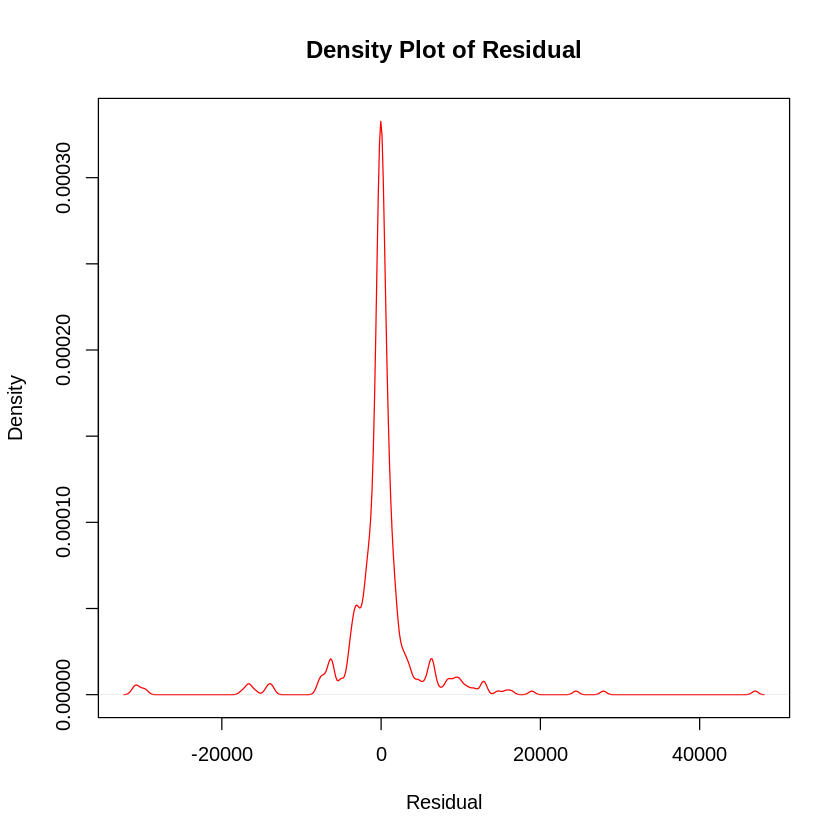

In [ ]:
plot(density(data$TOTCHG - TOTCHG_prediction),col = 'red',
# calculates the density (probability distribution) of the residuals, which are obtained by subtracting
# the predicted values (TOTCHG_prediction) from the actual values (data$TOTCHG)
# eventually this creates a smooth curve that represents the distribution of residuals
    xlab = 'Residual',
    ylab = 'Density',
    main = 'Density Plot of Residual')

We can see distribution of Residual is nearly normal, that means our model is doing good.

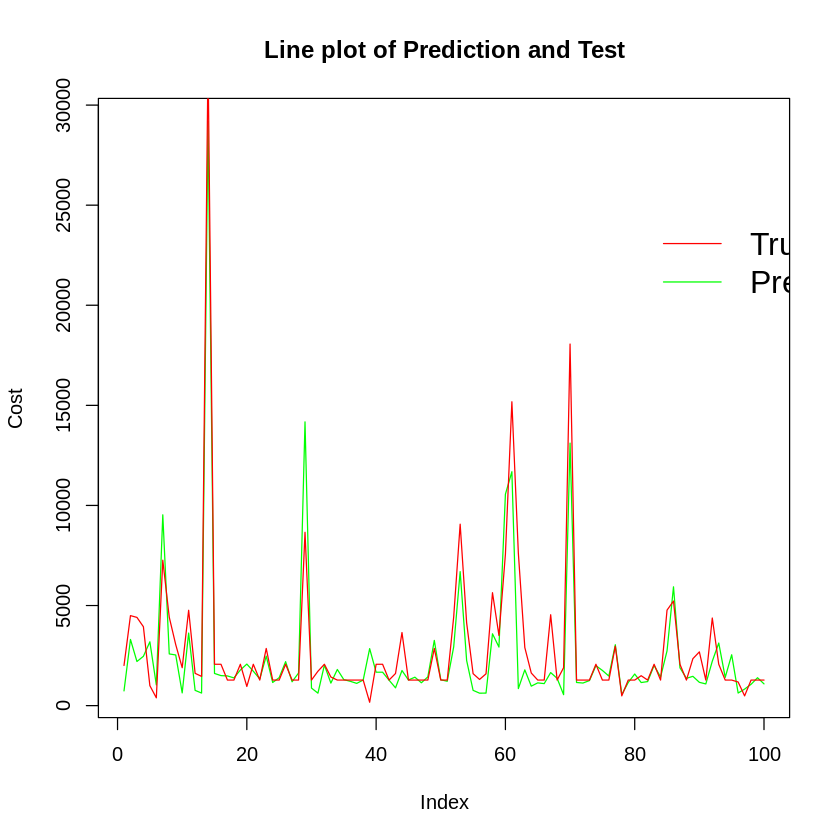

In [ ]:
plot(test_data$TOTCHG,type='l',col='green',main = 'Line plot of Prediction and Test',
# plot the actual values of "TOTCHG" from the test dataset in green
# add the main title

    xlab = 'Index',ylab = 'Cost')
lines(TOTCHG_prediction,type = 'l',col='red')
# add the predicted values (TOTCHG_prediction) as a red line to the existing plot

legend(80, 25000, legend=c("True", "Pred."),
       col=c("red", "green"), lty=1:1, cex=1.6,box.lty = 0)
       # The lty argument specifies the line type in the legend (or plot). lty=1 means a solid line
       # The cex parameter controls the size of the text in the legend
       # The box.lty argument controls the line type of the box surrounding the legend

We can see how good our model is doing with test data!!

##2. Support Vector Classifier
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).

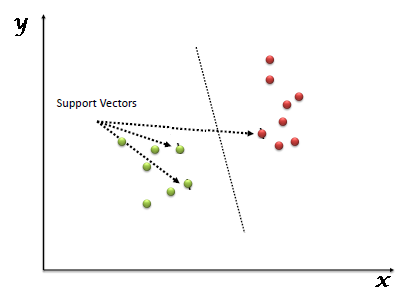

In [ ]:
data1=read.csv("/content/wisc_bc_data.csv",sep = ",",header = TRUE)
# sep = "," specifies that the values in the CSV file are separated by commas

data=data1[,-c(1)]
# create a new data frame called "data" by excluding the first column (column 1) of the "data1" data frame
# This is often done to remove an unnecessary identifier or index column

data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))
# convert the "diagnosis" variable to a factor variable and assigns it back to the "data" data frame
# levels = c("M", "B") specifies the levels of the factor variable, where "M" represents malignant and "B" represents benign
# labels = c(1, 0) assigns numeric values 1 and 0 to the "M" and "B" levels, respectively

###1. Data Splitting


In [ ]:
install.packages("caTools")
library(caTools)
set.seed(123)
sample=sample.split(data$diagnosis,SplitRatio = 0.80)
train_set=subset(data,sample==TRUE)
test_set=subset(data,sample==FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




###2. Model Building

In [ ]:
install.packages('e1071')
# The "e1071" package is a popular package for machine learning and statistical analysis
# It provides various functions and algorithms for support vector machines (SVM), as well as other machine learning techniques
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model=svm(diagnosis~.,train_set,
# create an SVM model
         type = 'C-classification',
         # The type indicates that it's a C-class classification (binary classification)
         kernel = 'linear')
         # Specifies that you are using a linear kernel for the SVM, which means that the decision boundary will be linear

In [ ]:
summary(model)


Call:
svm(formula = diagnosis ~ ., data = train_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  35

 ( 20 15 )


Number of Classes:  2 

Levels: 
 1 0




### 3. Model Evaluation and Prediction

In [ ]:
pred=predict(model,test_set)

In [ ]:
install.packages('caret')
# caret is used for simplifying and streamlining the process of working with machine learning models and datasets
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
confusionMatrix(as.factor(test_set$diagnosis),as.factor(pred))
# Compute the confusion matrix for a classification problem


# True Positives (TP): The number of observations that were correctly classified as positive (e.g., correctly identified as malignant).
# True Negatives (TN): The number of observations that were correctly classified as negative (e.g., correctly identified as benign).
# False Positives (FP): The number of observations that were incorrectly classified as positive when they were actually negative (e.g., false alarms).
# False Negatives (FN): The number of observations that were incorrectly classified as negative when they were actually positive (e.g., missed diagnoses).



Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 40  2
         0  0 71
                                          
               Accuracy : 0.9823          
                 95% CI : (0.9375, 0.9978)
    No Information Rate : 0.646           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9617          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9726          
         Pos Pred Value : 0.9524          
         Neg Pred Value : 1.0000          
             Prevalence : 0.3540          
         Detection Rate : 0.3540          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9863          
                                          
       'Positive' Class : 1               
                                    

Just see how well our model is able to learn the things :) Everything is Perfect!!

##3. CART : Decision Tree

Classification And Regression Trees : Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.

The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

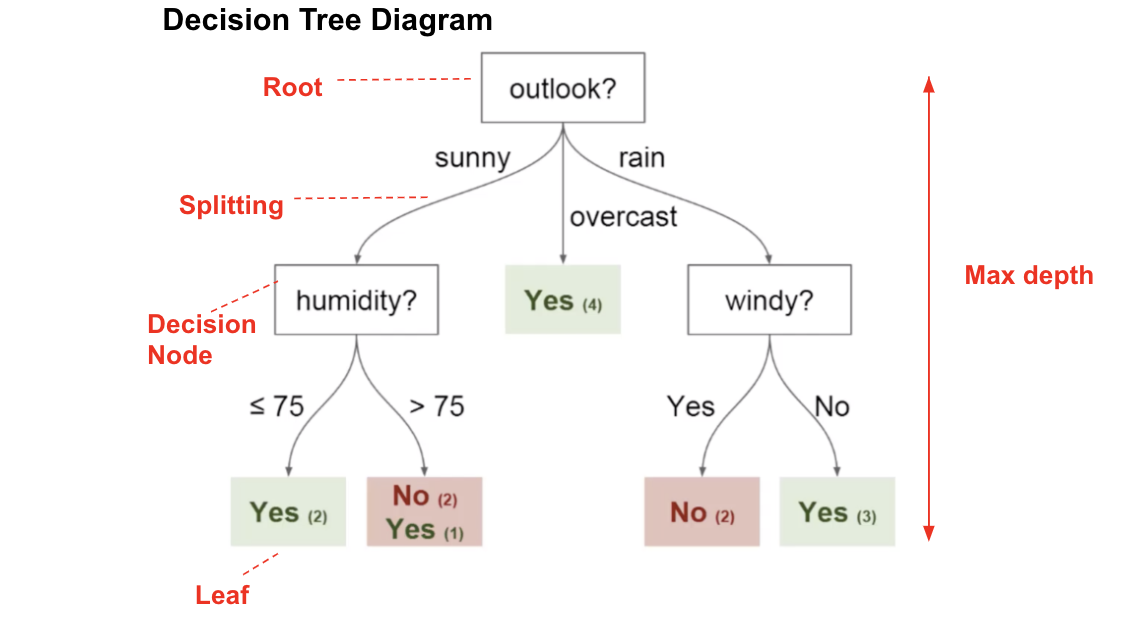

In [ ]:
data1=read.csv("/content/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))
head(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
2,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
3,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
4,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,⋯,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
5,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,⋯,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
6,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,⋯,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


###1 Train Test Split

In [ ]:
set.seed(123)
sample=sample.split(data$diagnosis,SplitRatio = 0.80)
train_set=subset(data,sample==TRUE)
test_set=subset(data,sample==FALSE)

### 2 Model Building

In [ ]:
install.packages('rpart')
# (Recursive Partitioning and Regression Trees) package in R
# Package provides functions and tools for creating and visualizing decision trees, which are used in both classification and regression tasks
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model=rpart(diagnosis~.,train_set)

### 3 Plot the Model

In [ ]:
install.packages('rattle')
# The "rattle" package is an extension package that provides a graphical user interface (GUI) for data mining and machine learning
# It is designed to make it easier for users, especially those who are not familiar with programming
library(rattle)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rpart.plot’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [ ]:
library(rpart.plot)
# an extension package that provides functions for visualizing decision trees created using the "rpart" package, which you loaded earlier

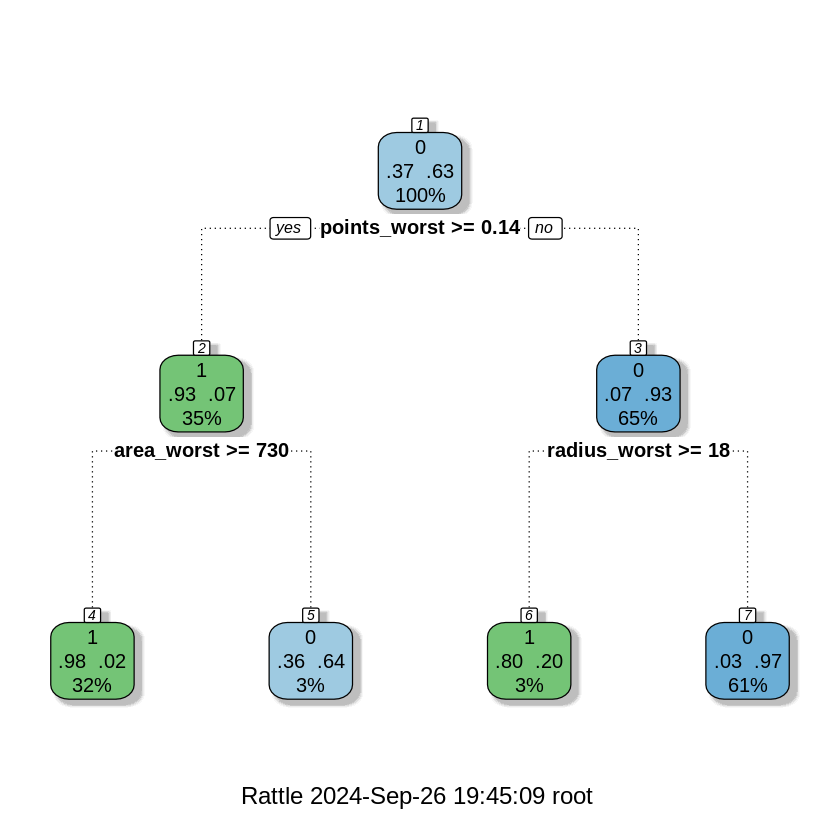

In [ ]:
fancyRpartPlot(model)
#The fancyRpartPlot() function is used to create a visually appealing and customized plot of a decision tree created using the "rpart" package in R
# In your case, you are applying this function to your previously created decision tree model stored in the model object.

### 4 Evaluation and Prediction

In [ ]:
pred=predict(model,test_set,type = "class")
# The type = "class" argument specifies that you want to obtain class predictions (e.g., "M" or "B" for malignant or benign) rather than numeric predictions

confusionMatrix(as.factor(test_set$diagnosis),as.factor(pred))
#This line computes a confusion matrix by comparing the actual diagnosis values in the test set (test_set$diagnosis) with the predicted class labels (pred)
# as.factor() is used to ensure that both the actual and predicted values are treated as factors (categorical variables)

Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 35  7
         0  1 70
                                          
               Accuracy : 0.9292          
                 95% CI : (0.8653, 0.9689)
    No Information Rate : 0.6814          
    P-Value [Acc > NIR] : 2.078e-10       
                                          
                  Kappa : 0.8439          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9722          
            Specificity : 0.9091          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.9859          
             Prevalence : 0.3186          
         Detection Rate : 0.3097          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9407          
                                          
       'Positive' Class : 1               
                                    

Model is doing good, But we can see SVC was far better than this :)

##4. KNN

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

To evaluate any technique we generally look at 3 important aspects:

- Ease to interpret output

- Calculation time

- Predictive Power

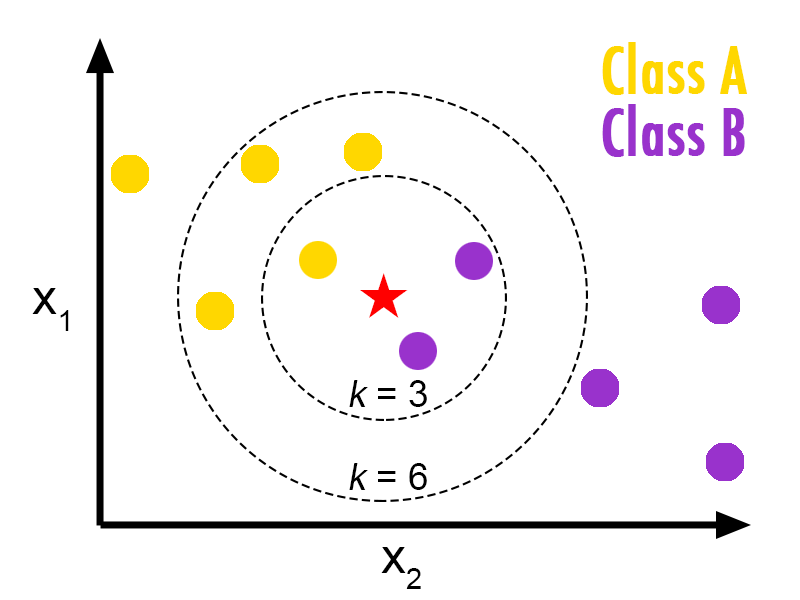

In [ ]:
data1=read.csv("/content/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))

normalize<-function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
# define a custom function called normalize
# This function takes a numeric vector x as input and returns the normalized version of x, scaling it between 0 and 1 using min-max normalization

data=as.data.frame(lapply(data1[3:31], normalize))
# apply the normalize function to normalize the numeric columns (columns 3 to 31) of the original data (before excluding the first column)
# lapply(data1[3:31], normalize) applies the normalize function to each of the selected numeric columns
# as.data.frame() is used to convert the result back into a data frame, replacing the original data with the normalized value

head(data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,⋯,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2526859,0.0906324,0.2422777,0.13599152,0.4529205,0.1546838,0.09341612,0.18389662,0.4540404,0.2019798,⋯,0.04675041,0.1981501,0.09648188,0.1820808,0.08943669,0.4446279,0.09635106,0.09920128,0.3227148,0.2487680
2,0.1712812,0.3124789,0.1761454,0.08606575,0.3994764,0.2923747,0.14964855,0.13131213,0.4353535,0.3148694,⋯,0.08371682,0.1405194,0.29104478,0.1388017,0.05888714,0.3310440,0.21752966,0.15303514,0.2723711,0.2710428
3,0.1921056,0.2407846,0.1874784,0.09743372,0.4971563,0.1799276,0.07136832,0.12326044,0.3303030,0.2830666,⋯,0.04502301,0.1593739,0.38432836,0.1470193,0.07034015,0.4340619,0.11730749,0.08522364,0.2553608,0.2824759
4,0.2034644,0.1244505,0.2018520,0.10235419,0.5756974,0.2890007,0.10859888,0.23836978,0.3590909,0.2266217,⋯,0.08800077,0.1419424,0.09994670,0.1300862,0.06114825,0.4327412,0.15029446,0.06924121,0.2959107,0.1058545
5,0.3885182,0.1183632,0.3721927,0.24106045,0.2437483,0.1532421,0.07949859,0.13205765,0.3338384,0.1154170,⋯,0.03013280,0.2942014,0.09888060,0.2693859,0.15579532,0.2735918,0.14204771,0.10878594,0.2810309,0.1817465
6,0.2171896,0.3155225,0.2101444,0.11291622,0.2963799,0.1774124,0.12851453,0.07097416,0.4904040,0.2676917,⋯,0.08444233,0.1828531,0.39872068,0.1793914,0.08240759,0.3548174,0.16145181,0.20447284,0.2290034,0.2897694


###1 Train Test Split

In [ ]:
wbcd_train=data[1:469,]
wbcd_test=data[470:569,]

wbcd_train_labels=data1[1:469,2]
wbcd_test_labels=data1[470:569,2]

###2 Model Building & Evaluation

In [ ]:
install.packages('caret')
install.packages('class')

# The "class" package provides functions for performing various classification tasks, including k-nearest neighbors (K-NN) classification.
# K-NN is a popular classification algorithm that classifies an observation based on the majority class of its k nearest neighbors in the feature space
# The "class" package provides tools to implement and customize K-NN classification in R

library(class)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
wbcd_test_pred=knn(train = wbcd_train,test = wbcd_test,
                   cl=wbcd_train_labels,k=21)

# the knn() function will apply the K-NN algorithm to the test data
# For each instance in the test data, it will find the 21 nearest neighbors
# from the training data based on the chosen distance metric and use a majority vote to predict the class of the test instance

In [ ]:
confusionMatrix(as.factor(wbcd_test_labels),as.factor(wbcd_test_pred))
# compute the confusion matrix and related classification metrics for a classification problem

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 61  0
         M  3 36
                                          
               Accuracy : 0.97            
                 95% CI : (0.9148, 0.9938)
    No Information Rate : 0.64            
    P-Value [Acc > NIR] : 1.262e-15       
                                          
                  Kappa : 0.9361          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.9531          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9231          
             Prevalence : 0.6400          
         Detection Rate : 0.6100          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.9766          
                                          
       'Positive' Class : B               
                                    

We can clearly see KNN is doing even better than SVC!!

##5. Naive Bayes

We will make a SMS Filter using Naive Bayes!!

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.



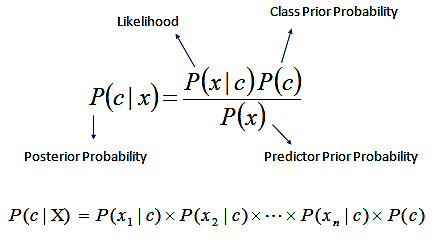

In [ ]:
sms_raw=read.csv("/content/sms_spam.csv",stringsAsFactors = FALSE)
# The stringsAsFactors = FALSE argument ensures that character vectors in the data frame are not automatically converted to factors
# This is useful when you want to work with text data as-is, without converting it to factors.


sms_raw$type=as.factor(sms_raw$type)
# convert the "type" column in the sms_raw data frame to a factor
# as.factor() is used to perform the conversion
# By converting the "type" column to a factor, you are likely preparing the data for a classification task where "type" represents the class labels

In [ ]:
install.packages('tm')
library(tm)
# The "tm" package provides a set of tools and functions for performing text mining and text analysis tasks
# Text mining involves extracting meaningful insights and information from unstructured text data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [ ]:
# createa a "VCorpus" object, which is a corpus (a collection of text documents) in the "tm" package
# The "V" in "VCorpus" stands for "Vector," indicating that it is a corpus created from a vector of text data

sms_corpus=VCorpus(VectorSource(sms_raw$text))

In [ ]:
# apply the as.character function to the first three elements of the "sms_corpus" object, which are text documents in the corpus
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

$`2`
[1] "Ok lar... Joking wif u oni..."

$`3`
[1] "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

###1 Text Cleaning

In [ ]:
#tRANSFORMING ALL THE SMS IN TO LOWER LETTER

sms_corpus_clean=tm_map(sms_corpus,content_transformer(tolower))

In [ ]:
#removing Numbers
sms_corpus_clean=tm_map(sms_corpus_clean,removeNumbers)

In [ ]:
#removing StopWords
sms_corpus_clean=tm_map(sms_corpus_clean,removeWords,stopwords())

In [ ]:
#removing Punctuation
sms_corpus_clean=tm_map(sms_corpus_clean,removePunctuation)

In [ ]:
#Stemming
install.packages('SnowballC')
library(SnowballC)
# library provides stemming algorithms for multiple languages

sms_corpus_clean=tm_map(sms_corpus_clean,
                        stemDocument)

# StemDocument is used to perform stemming on text documents
# Stemming reduces words to their base or root form, which can help in simplifying the text and grouping variations of a word together
# For example, "jumping" and "jumps" might be stemmed to "jump

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Removing Extra WhiteSpace
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stripWhitespace)

In [ ]:
#Document Term Matrix(Tokenization)
sms_dtm=DocumentTermMatrix(sms_corpus_clean)
sms_dtm

# A DTM is a matrix that represents the frequency of terms (words or phrases) in a collection of documents
# Rows typically represent documents, and columns represent terms (words or phrases)
# The values in the matrix represent the frequency of each term in each document
# When you run this code, it will generate the "sms_dtm" object, which is a Document-Term Matrix containing the term
# frequencies for the words or terms found in the preprocessed text documents



<<DocumentTermMatrix (documents: 5574, terms: 6570)>>
Non-/sparse entries: 42584/36578596
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

###2 Train Test Split

In [ ]:
sms_dtm_train=sms_dtm[1:4174,]
sms_dtm_test=sms_dtm[4175:5574,]

sms_train_labels=sms_raw[1:4174,]$type
sms_test_labels=sms_raw[4175:5574,]$type

In [ ]:
prop.table(table(sms_train_labels))
# calculate the proportion (or percentage) of each class label in the training set labels

sms_train_labels
      ham      spam 
0.8646382 0.1353618 

In [ ]:
prop.table(table(sms_test_labels))
# calculate the proportion (or percentage) of each class label in the testing set labels

sms_test_labels
 ham spam 
0.87 0.13 

In [ ]:
install.packages("wordcloud")
library(wordcloud)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



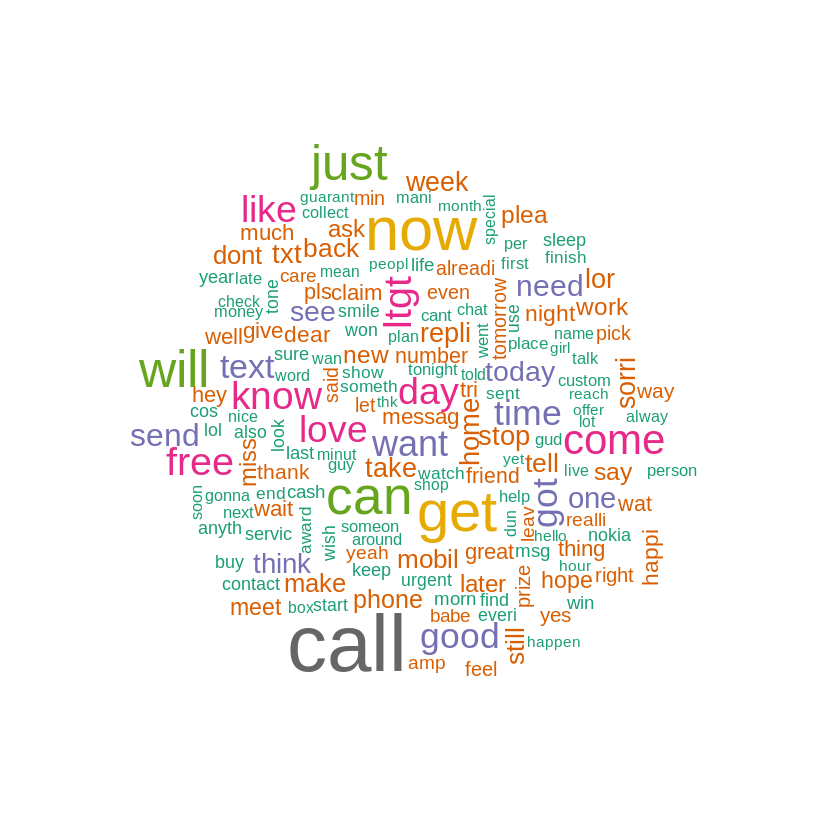

In [ ]:
wordcloud(sms_corpus_clean,min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))
# the "Dark2" color palette from the RColorBrewer package to color the words in the word cloud

We can see top occuring words :)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


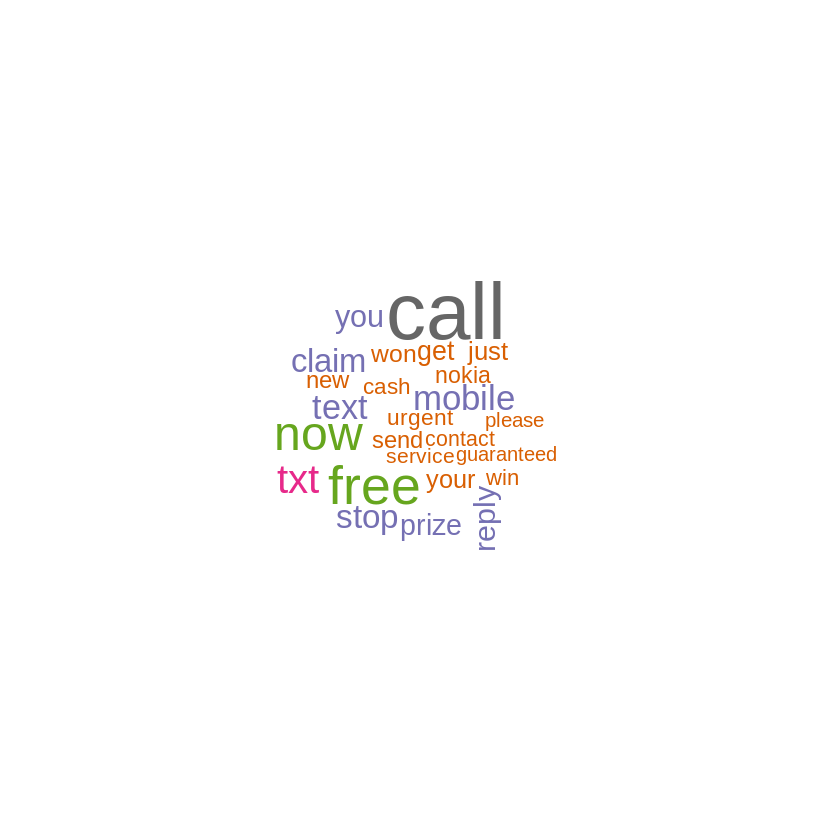

In [ ]:
spam=subset(sms_raw,type=="spam")
ham=subset(sms_raw,type=="ham")

wordcloud(spam$text,min.freq = 50,random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

We can see SPAM messages are mostly containing words like call, free etc.

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


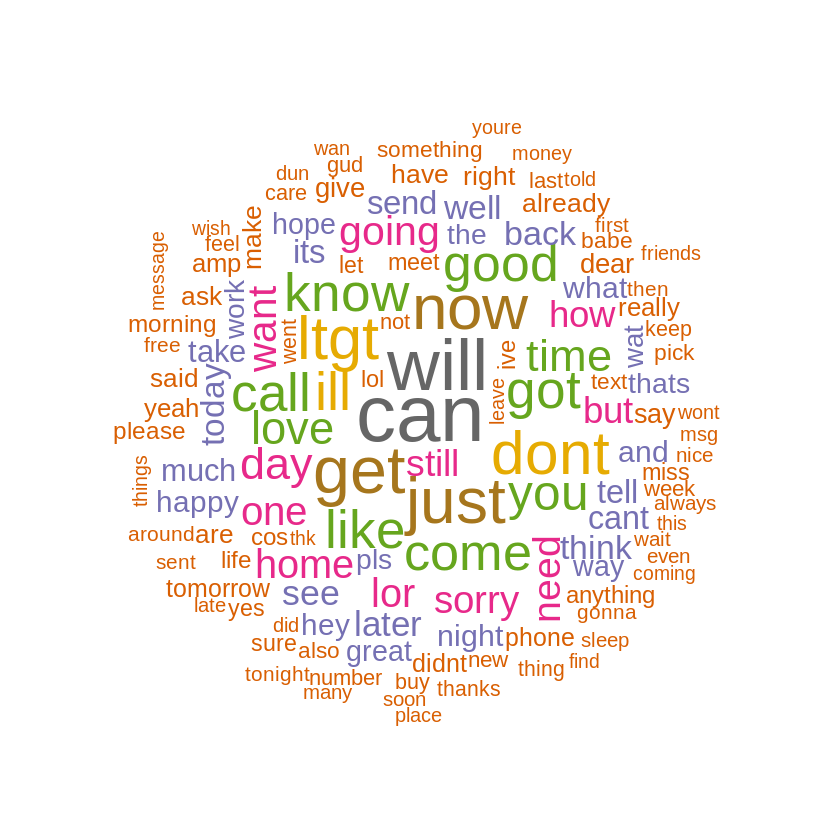

In [ ]:
wordcloud(ham$text,min.freq = 50,random.order = FALSE,colors = brewer.pal(8,"Dark2"))

We can see top occuring words in Ham Messages!!

In [ ]:
sms_freq_words=findFreqTerms(sms_dtm_train,5)
# identify frequent terms (words or features) in the training DTM that appear at least 5 times in the training documents

sms_dtm_freq_train=sms_dtm_train[,sms_freq_words]
# subset= the training DTM ("sms_dtm_train") to only include the columns corresponding to the frequent terms identified earlier

sms_dtm_freq_test=sms_dtm_test[,sms_freq_words]
# subset= the training DTM ("sms_dtm_test") to only include the columns corresponding to the frequent terms identified earlier

convert_counts=function(x){
  x=ifelse(x>0,"Yes","No")
}
# defines a custom function called "convert_counts." This function takes a numeric input "x" (presumably
# the values in your binary DTM), and it converts values greater than 0 to "Yes" and values less than or equal to 0 to "No."

sms_train=apply(sms_dtm_freq_train,2,convert_counts)
# apply the "convert_counts" function to each column (term) in the "sms_dtm_freq_train" DTM
# It effectively converts the term frequency counts into binary values of "Yes" or "No"
# based on whether a term is present (count > 0) or not (count <= 0) in each document of the training dataset

sms_test=apply(sms_dtm_freq_test, 2, convert_counts)
# applies the "convert_counts" function to each column in the "sms_dtm_freq_test" DTM,
# converting the term frequency counts into binary values for the test dataset

###3. SMS Filter Model

In [ ]:
install.packages("e1071")
library(e1071)
# Package e1071 provides functions and tools for machine learning, including support for building Naive Bayes classifiers

sms_classifier=naiveBayes(sms_train,sms_train_labels)
sms_classifier

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’





Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = sms_train, y = sms_train_labels)

A-priori probabilities:
sms_train_labels
      ham      spam 
0.8646382 0.1353618 

Conditional probabilities:
                £wk
sms_train_labels          No         Yes
            ham  1.000000000 0.000000000
            spam 0.991150442 0.008849558

                abiola
sms_train_labels          No         Yes
            ham  0.996952064 0.003047936
            spam 1.000000000 0.000000000

                abl
sms_train_labels          No         Yes
            ham  0.995012469 0.004987531
            spam 1.000000000 0.000000000

                abt
sms_train_labels          No         Yes
            ham  0.994458299 0.005541701
            spam 1.000000000 0.000000000

                accept
sms_train_labels         No        Yes
            ham  0.99833749 0.00166251
            spam 1.00000000 0.00000000

                access
sms_train_labels           No     

### 4. Evaluation and Prediction

In [ ]:
sms_test_pred=predict(sms_classifier,sms_test)
# The predict function is used to obtain predictions

In [ ]:
install.packages("caret")
library("caret")
confusionMatrix(sms_test_pred, sms_test_labels, positive = "spam")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1209   20
      spam    9  162
                                          
               Accuracy : 0.9793          
                 95% CI : (0.9704, 0.9861)
    No Information Rate : 0.87            
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.906           
                                          
 Mcnemar's Test P-Value : 0.06332         
                                          
            Sensitivity : 0.8901          
            Specificity : 0.9926          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.9837          
             Prevalence : 0.1300          
         Detection Rate : 0.1157          
   Detection Prevalence : 0.1221          
      Balanced Accuracy : 0.9414          
                                          
       'Positive' Class : spam            
                        

We can see our classifier is doing really good in finding SPAM Messgaes!!!

## 6. Artificial Neural Networks (ANN)

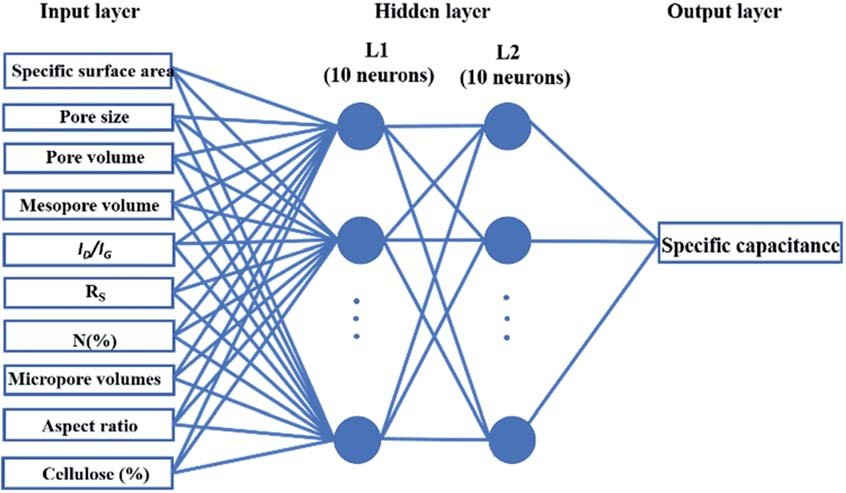

Artificial neural networks are one of the main tools used in machine learning

As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn

Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use

They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize

In [ ]:
concrete=read.csv("concrete.csv")

normalize=function(x){
  return((x-min(x))/(max(x)-min(x)))
}
# This function takes a vector "x" as input and normalizes it to a range between 0 and 1
# The formula used for normalization is (x - min(x)) / (max(x) - min(x))
# This function will be applied to each column of the "concrete" dataset to normalize the numeric values

concrete_norm=as.data.frame(lapply(concrete, normalize))
# Creating a new data frame named "concrete_norm" by applying the "normalize" function to each column of the "concrete" dataset
# This operation normalizes all the numeric columns in the dataset, ensuring that they have values within the range [0, 1]

head(concrete_norm)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.08972603,0.5898720,0.0000000,0.6525559,0.0000000,0.4965116,0.3876066,0.07417582,0.3433412
2,0.15273973,0.1174179,0.6211894,0.2915335,0.3354037,0.8133721,0.5072755,0.03571429,0.2638595
3,0.33789954,0.0000000,0.4782609,0.5239617,0.1708075,0.4531977,0.6703462,0.07417582,0.3349944
4,0.37442922,0.3171953,0.0000000,0.8482428,0.0000000,0.3808140,0.1906673,0.07417582,0.5421702
5,0.12054795,0.5102949,0.0000000,0.5710863,0.2826087,0.7162791,0.2576518,0.07417582,0.1988290
6,0.34931507,0.0000000,0.0000000,0.5607029,0.0000000,0.2581395,0.8805820,0.24450549,0.2433038


### 1 Train Test Split

In [ ]:
set.seed(12345)
concrete_train=concrete_norm[1:773,]
concrete_test=concrete_norm[773:1030,]

###2 Training ANN

In [ ]:
install.packages("neuralnet")
library(neuralnet)

# a package for creating and training artificial neural networks

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [ ]:
model=neuralnet(strength~.,concrete_train,hidden = c(4))

# strength ~ .: This specifies the formula for the model
# It means you want to predict the "strength" variable (target) based on all other variables (features) in the dataset

# concrete_train: This is the training dataset you've prepared, containing both the target variable ("strength") and the input features

# hidden = c(4): This specifies the structure of the neural network
# In this case, you have one hidden layer with four neurons (nodes)
# The number of neurons in the hidden layer and the architecture of the network can be adjusted based on your specific problem and experimentation



### 3 Plot Model

In [ ]:
plot(model)
#	The plot will show the connections between input neurons, hidden neurons, and the output neuron corresponding to the "strength" prediction

In [ ]:
model_result=compute(model,concrete_test[1:8])
# use the first eight columns of the test dataset as input features

pred=model_result$net.result
# The predictions are stored in the "net.result" component of the "model_result" object

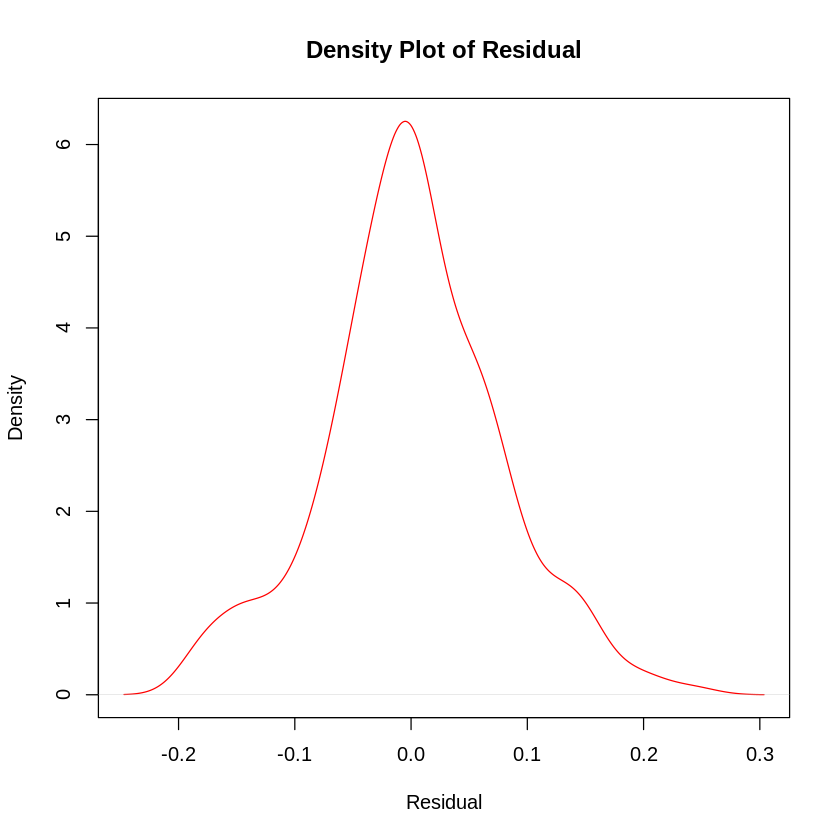

In [ ]:
plot(density(concrete_test$strength - pred),col = 'red',
    xlab = 'Residual',
    ylab = 'Density',
    main = 'Density Plot of Residual')

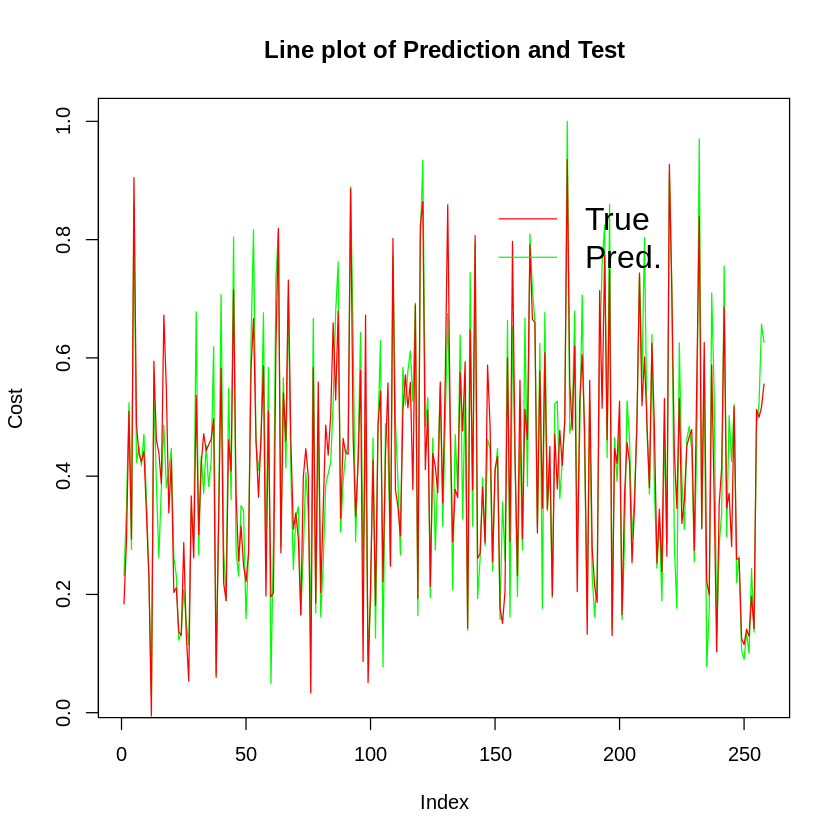

In [ ]:
plot(concrete_test$strength,type='l',col='green',main = 'Line plot of Prediction and Test',
    xlab = 'Index',ylab = 'Cost')
lines(pred,type = 'l',col='red')

legend(140, 0.9, legend=c("True", "Pred."),
       col=c("red", "green"), lty=1:1, cex=1.6,box.lty = 0)

We can see distribution of error are normal and prediction are also not that bad

But In mid it is deviating a bit. You may try a more complex nn at your own!!

## 7. APRIORI

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases

It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database

The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis

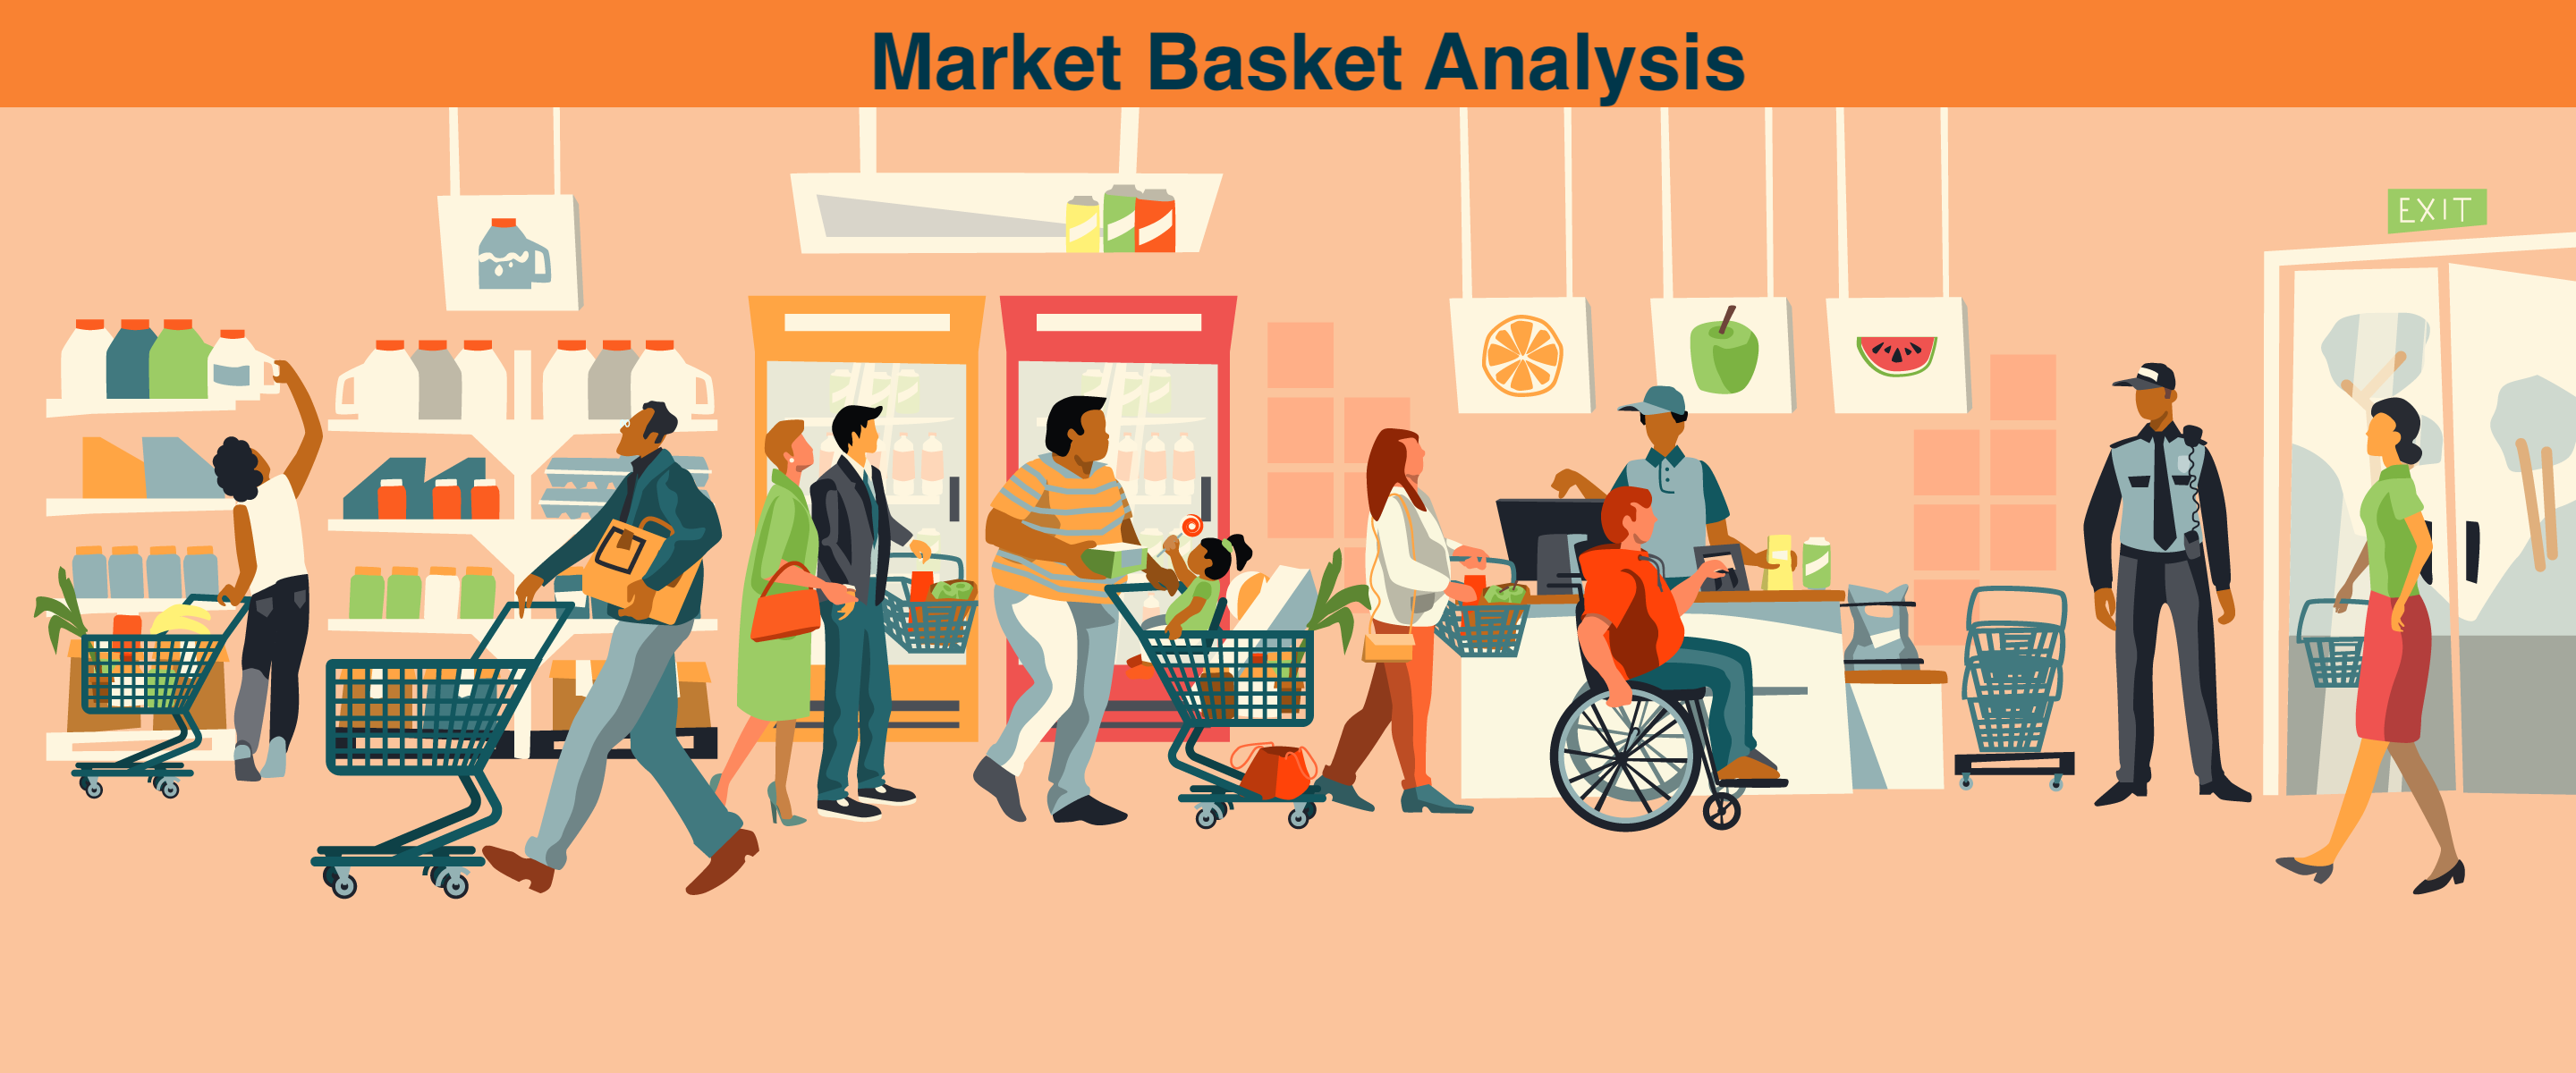

In [ ]:
install.packages("arules")
library(arules)

# package is used for association rule mining and frequent itemset mining in data analysis
# It provides functions and tools to discover patterns, associations,
# and relationships within large datasets, especially in the context of market basket analysis, recommendation systems, and other data mining tasks

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:tm’:

    inspect


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
data=read.transactions("groceries.csv",sep=",")
summary(data)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [ ]:
inspect(data[1:2])

    items                
[1] {citrus fruit,       
     margarine,          
     ready soups,        
     semi-finished bread}
[2] {coffee,             
     tropical fruit,     
     yogurt}             


In [ ]:
rules=apriori(data,
              parameter = list(support=0.001,
                               confidence=0.8,
                               minlen=2))

# perform association rule mining on your transaction dataset

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


* support = 0.001: This sets the minimum support threshold to 0.001. Support measures the proportion of transactions in which a rule appears. Rules with support greater than or equal to this threshold will be considered frequent

* confidence = 0.8: This sets the minimum confidence threshold to 0.8. Confidence measures the strength of the association between items in a rule. Rules with confidence greater than or equal to this threshold will be considered strong

* minlen = 2: This sets the minimum length of rules to 2. In other words, it specifies that you are interested in association rules with at least two items on the left-hand side (antecedent)

In [ ]:
inspect(head(sort(rules,by="lift")[1:3]))
# inspect allows you to inspect and view specific association rules
# Lift is a measure of how much more likely items are to be bought together compared to what would be expected by chance

    lhs                         rhs                   support confidence    coverage     lift count
[1] {liquor,                                                                                       
     red/blush wine}         => {bottled beer}    0.001931876  0.9047619 0.002135231 11.23527    19
[2] {citrus fruit,                                                                                 
     fruit/vegetable juice,                                                                        
     other vegetables,                                                                             
     soda}                   => {root vegetables} 0.001016777  0.9090909 0.001118454  8.34040    10
[3] {oil,                                                                                          
     other vegetables,                                                                             
     tropical fruit,                                                                               


We can see the combination of items that should be kept together :)